<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/Baseline_random_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2021-01-12 07:01:27 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Artifacts ─────── v1.3.0
  Installed VersionParsing ── v1.2.0
  Installed MbedTLS_jll ───── v2.16.8+1
  Installed ZeroMQ_jll ────── v4.3.2+5
  Installed SoftGlobalScope ─ v1.1.0
  Installed Parsers ───────── v1.0.15
  Installed IJulia ────────── v1.23.1
  Installed JLLWrappers ───── v1.2.0
  Installed JSON ──────────── v0.21.1
  Installed Conda ─────────── v1.5.0
  Installed MbedTLS ───────── v1.0.3
  Installed ZMQ ───────────── v1.2.1
######################################################################## 100.

In [1]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


In [2]:
import Pkg
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [9a3f8284] + Random 
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed PyPlot ─ v2.9.0
  Installed PyCall ─ v1.92.2
   Updating `~/.julia/environments/v1.4/Project.toml`
  [d330b81b] + PyPlot v2.9.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] + PyCall v1.92.2
  [d330b81b] + PyPlot v2.9.0
   Building PyCall → `~/.julia/packages/PyCall/tqyST/deps/build.log`


In [36]:
n=100 # length of read
l=1e7/n # no. of reads
l=Int32(l) # length of genome: 1e7
x=rand(1:1e7,l);  # Using random the starting positions of reads of length 100 are simulated and stored in an array

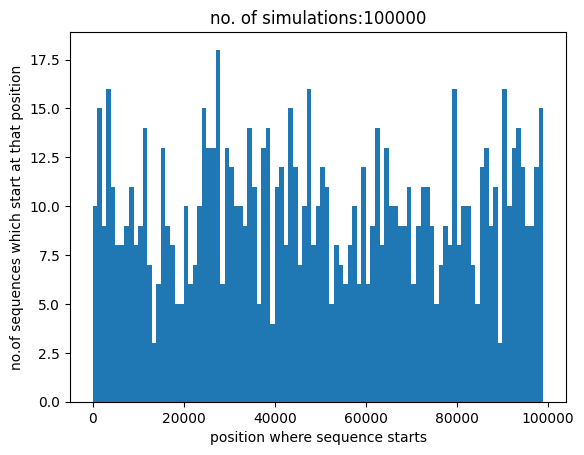

PyObject Text(0.5, 1.0, 'no. of simulations:100000')

In [37]:
using PyPlot 
fig,ax = plt.subplots(1,1)
ax.hist(x,bins=1:1000:1e5)
plt.xlabel("position where sequence starts")
plt.ylabel("no.of sequences which start at that position")
plt.title("no. of simulations:"*string(l))

In [38]:
x=sort(x); # We find the lengths of various zero coverage regions .
x1=[]
for i in 1:l-1
    if x[i+1]-x[i]>=100
        append!(x1,x[i+1]-x[i]-100)
    end
end

In [39]:
x2=[] # We find the lengths of various one coverage regions.
i=2
while (i<l)
    d=0
    if x[i-1]+100<x[i] && x[i]+100<x[i+1]
        append!(x2,100)
    elseif x[i-1]+100>x[i] && x[i]+100<x[i+1]
        append!(x2,x[i-1]+100-x[i])
    elseif x[i-1]+100<x[i] && x[i+1]<x[i]+100
        append!(x2,x[i+1]-x[i])   
    else
        d=x[i+1]-x[i-1]-100
        if d>0
            append!(x2,d)
        end
    end
    i+=1
end

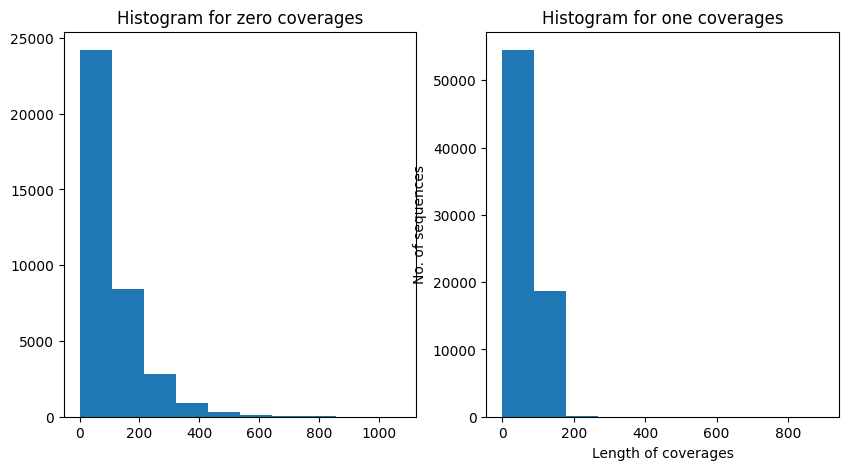

PyObject Text(0.5, 1.0, 'Histogram for one coverages')

In [40]:
fig,(axs1,axs2)=plt.subplots(1,2,figsize=(10,5))
axs1.hist(x1)
axs2.hist(x2)
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
axs1.set_title("Histogram for zero coverages")
axs2.set_title("Histogram for one coverages")

### The algorithm for previous plots seems to be difficult for two coverages and above , so in the next algorithm we simulate the starting position of a read and add 1.0 to next 100 positions as well. so the final array which we obtain we will have no. of coverages above a particular location. The array will look like  [1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1] , by visual inspection for coverage 1 we have 2 regions of length 1 and 2. For coverage 2 the lengths will be 1 and 4. For coverage 3 the lengths will be 3 alone. The below code just finds the length of these regions and plots are plotted.

In [41]:
l=Int32(1e7)
n=100
s=Int32(4*l/n)
a=zeros(Float64,l)
for i in 1:s
    j=rand(1:l-100)
    for k in j:j+100
        a[k]+=1.0
    end
end

In [42]:
x11=[]
d=0
for i in 1:l
    if a[i]==0
        d+=1
    else
        if d>0
            append!(x11,d)
        d=0
        end
    end
end

In [43]:
x22=[]
d=0
for i in 1:l
    if a[i]==1
        d+=1
    else
        if d>0
            append!(x22,d)
        d=0
        end
    end
end

In [44]:
x33=[]
d=0
for i in 1:l
    if a[i]==2
        d+=1
    else
        if d>0
            append!(x33,d)
        d=0
        end
    end
end

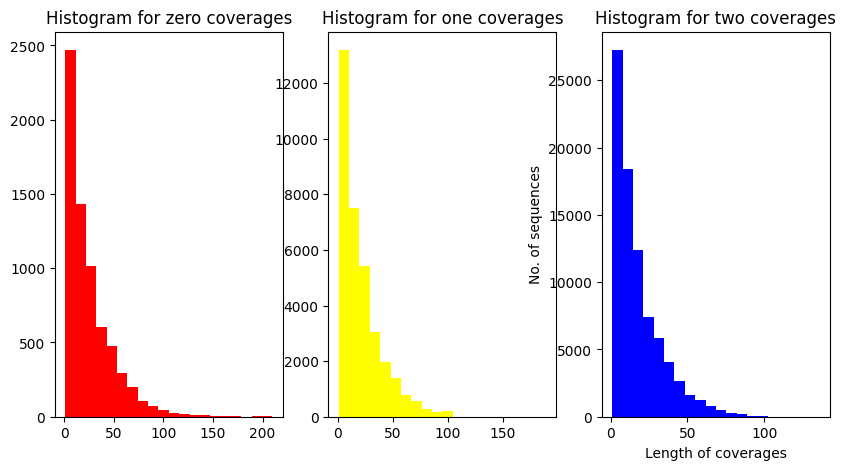

PyObject Text(0.5, 1.0, 'Histogram for two coverages')

In [45]:
fig,(axs1,axs2,axs3)=plt.subplots(1,3,figsize=(10,5))
axs1.hist(x11,bins=20,color="red")
axs2.hist(x22,bins=20,color="yellow")
axs3.hist(x33,bins=20,color="blue")
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
axs1.set_title("Histogram for zero coverages")
axs2.set_title("Histogram for one coverages")
axs3.set_title("Histogram for two coverages")

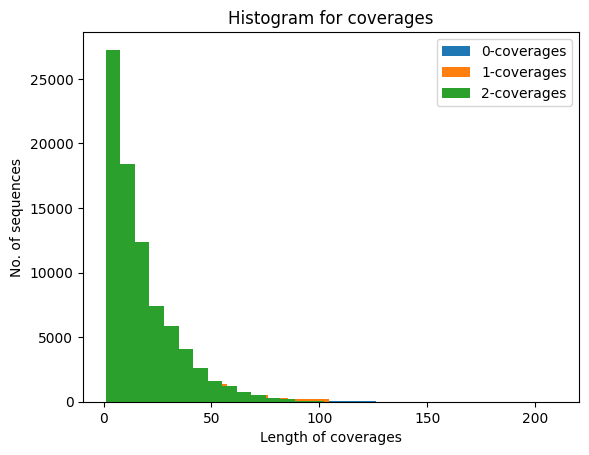

In [46]:
plt.hist(x11, bins=20,label="0-coverages")
plt.hist(x22, bins=20,label="1-coverages")
plt.hist(x33, bins=20,label="2-coverages")
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
plt.title("Histogram for coverages")
plt.legend()
plt.show()

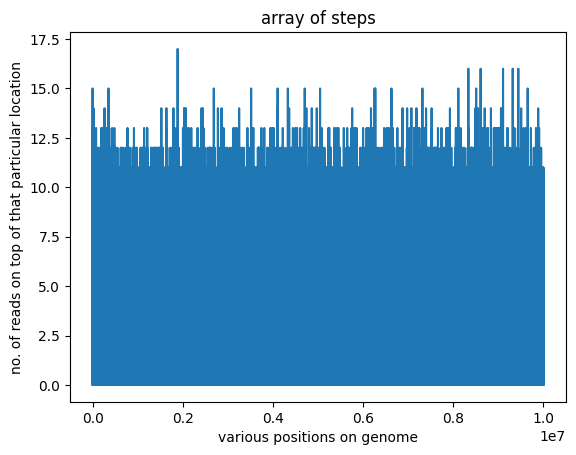

PyObject Text(24.00000000000002, 0.5, 'no. of reads on top of that particular location')

In [51]:
plt.plot(a)
plt.title("array of steps")
plt.xlabel("various positions on genome")
plt.ylabel("no. of reads on top of that particular location")